# Alura Care

### Análises e aplicação de modelo de Machine Learning de classificação

In [1]:
import pandas as pd

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')

In [2]:
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


## Tratamento de dados

In [3]:
# Verificando a existência de valores vazios

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

Há 419 valores vazios na coluna exame_33. A quantidade de dados faltantes representa 74% de toda a coluna, por isso não vale a pena realizar muitas inferências a seu respeito. Desse modo, a coluna será removida.

In [4]:
dados.drop(['exame_33'], axis = 1, inplace = True)

In [5]:
# Definindo as variáveis preditoras (X) e as variáveis alvo (y)

X = dados.drop(['id', 'diagnostico'], axis = 1)
y = dados['diagnostico']

In [6]:
# Definindo os dados de treino e de teste

from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state = 123143, test_size = 0.3)

In [7]:
# Import do modelo de Machine Learning

from sklearn.ensemble import RandomForestClassifier

In [8]:
# Instanciando o Random Forest

classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(X_treino, y_treino)

RandomForestClassifier()

In [9]:
# Score

print(f'Score de classificação = {100*classificador.score(X_teste, y_teste):.2f} %')

Score de classificação = 91.81 %


In [10]:
# Criando um Classificador Bobo (Algoritmo de Baseline)

from sklearn.dummy import DummyClassifier

classificador_bobo = DummyClassifier(strategy = 'most_frequent', random_state = 123143)

classificador_bobo.fit(X_treino, y_treino)

print(f'Score de classificação = {100*classificador_bobo.score(X_teste, y_teste):.2f} %')

Score de classificação = 66.67 %


## Visualização de dados

In [11]:
# Preparação dos dados

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
exames = dados.drop(['id', 'diagnostico'], axis = 1)

In [13]:
diagnostico = dados['diagnostico']

In [14]:
dados_plot = pd.concat([diagnostico, exames.iloc[:, 0:10]], axis = 1) # Apenas os primeiros 10 exames

In [15]:
dados_plot = pd.melt(dados_plot, 
                     id_vars = 'diagnostico', 
                     var_name = 'exames', 
                     value_name = 'valores')

In [16]:
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

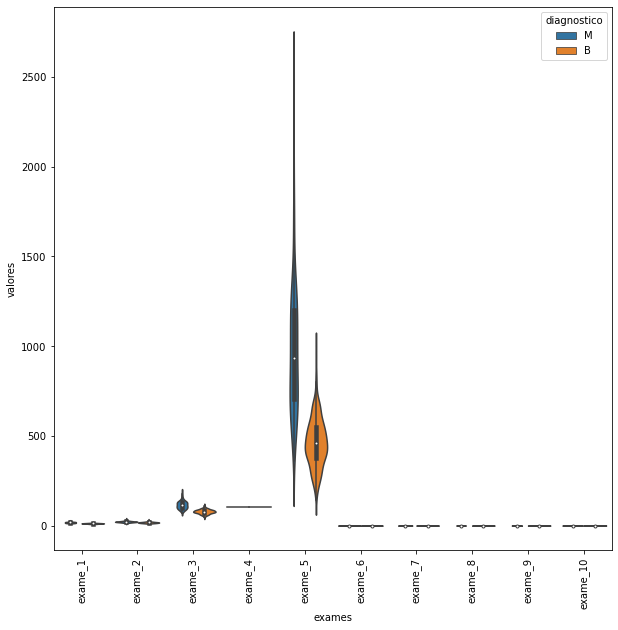

In [17]:
# Gráfico de violino

plt.figure(figsize = (10, 10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot)
plt.xticks(rotation = 90)

A visualização do gráfico não é das melhores. Um dos motivos para isso é o enorme range do eixo y. Para resolver esse problema, deve-se padronizar os valores desse eixo; isso será feito utilizando uma biblioteca do Scikit-learn.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
padronizador = StandardScaler()

In [20]:
padronizador.fit(exames)

StandardScaler()

In [21]:
exames_padronizados = padronizador.transform(exames)
exames_padronizados = pd.DataFrame(exames_padronizados)

In [22]:
exames_padronizados.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.097064,-2.073335,1.269934,1.0,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.0,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.0,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.0,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.0,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.0,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.0,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.0,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.0,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.0,0.729259,-0.868353,-0.397100


In [23]:
dados_plot = pd.concat([diagnostico, exames_padronizados.iloc[:, 0:10]], axis = 1) # Apenas os primeiros 10 exames

dados_plot = pd.melt(dados_plot, 
                     id_vars = 'diagnostico', 
                     var_name = 'exames_padronizados', 
                     value_name = 'valores')

<AxesSubplot:title={'center':'Gráficos dos exames 1 ao 10'}, xlabel='exames_padronizados', ylabel='valores'>

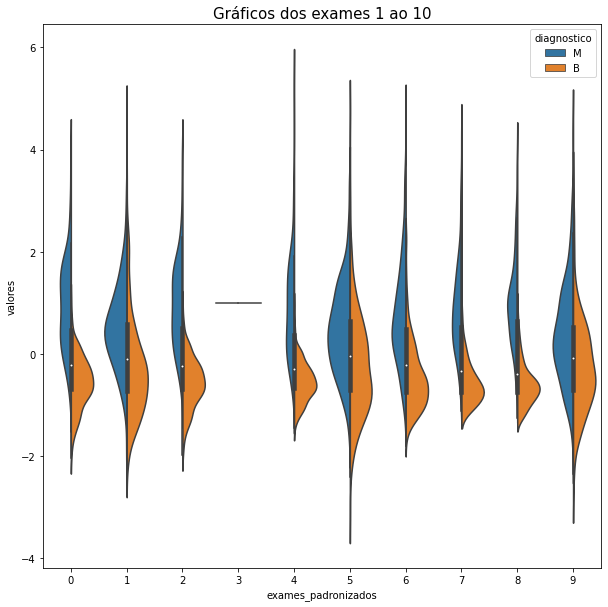

In [24]:
# Gráfico corrigido

plt.figure(figsize = (10, 10))
plt.title('Gráficos dos exames 1 ao 10', fontsize = 15)
sns.violinplot(x = 'exames_padronizados', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)

A fim de verificar o comportamento dos valores dos outros exames, foi criada uma função para plot dos gráficos.

In [25]:
def grafico_violino(exame_inicial, exame_final):

    dados_plot = pd.concat([diagnostico, exames_padronizados.iloc[:, exame_inicial:exame_final]], axis = 1) # Apenas os primeiros 10 exames

    dados_plot = pd.melt(dados_plot, 
                     id_vars = 'diagnostico', 
                     var_name = 'exames_padronizados', 
                     value_name = 'valores')
    if exame_final == -1:
        exame_final = 'último'
    return plt.figure(figsize = (10, 10)), plt.title(f'Gráficos dos exames {exame_inicial+1} ao {exame_final}', fontsize = 15), sns.violinplot(x = 'exames_padronizados', y = 'valores', hue = 'diagnostico', split = True, data = dados_plot)

(<Figure size 720x720 with 1 Axes>,
 Text(0.5, 1.0, 'Gráficos dos exames 11 ao 20'),
 <AxesSubplot:title={'center':'Gráficos dos exames 11 ao 20'}, xlabel='exames_padronizados', ylabel='valores'>)

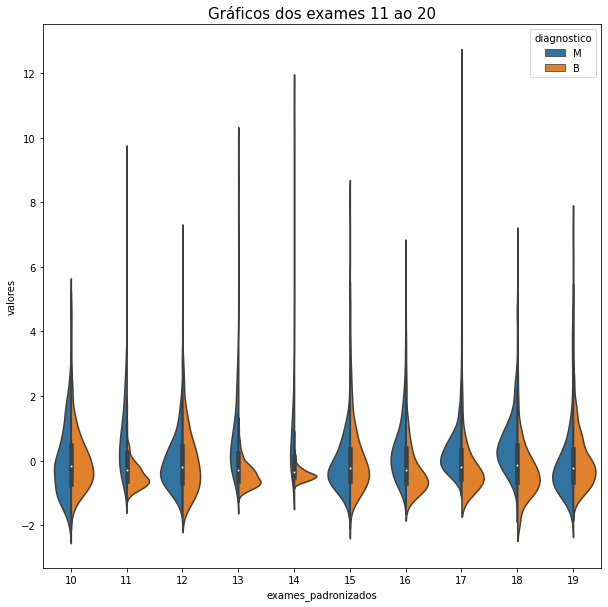

In [26]:
grafico_violino(10, 20)

(<Figure size 720x720 with 1 Axes>,
 Text(0.5, 1.0, 'Gráficos dos exames 21 ao último'),
 <AxesSubplot:title={'center':'Gráficos dos exames 21 ao último'}, xlabel='exames_padronizados', ylabel='valores'>)

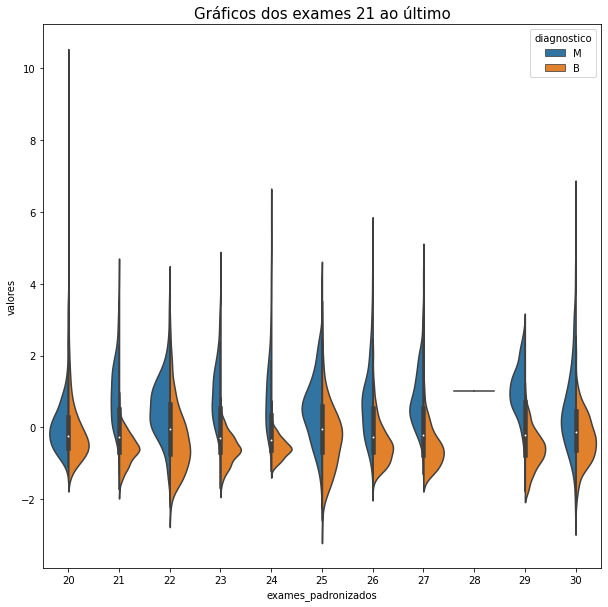

In [27]:
grafico_violino(20, -1)

Após verificação dos gráficos de todos os exames, fica claro que a tomada de decisão correta é eliminar os exames 4 e 29, pois possuem unicamente valores constantes em toda sua extensão.

In [28]:
exames_atualizados = exames_padronizados.drop([3, 28], axis = 1)

In [29]:
exames_atualizados.head()

,0,1,2,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,29,30,31
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Reclassificando o modelo de Machine Learning, agora com os valores de exames atualizados...

In [30]:
def classificar(valores_dos_exames):
    
    X_2 = valores_dos_exames
    y_2 = diagnostico
    
    X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(X_2, y_2, random_state = 123143, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)

    classificador.fit(X_treino2, y_treino2)

    print(f'Score de classificação = {100*classificador.score(X_teste2, y_teste2):.2f} %')

In [31]:
classificar(exames_atualizados)

Score de classificação = 92.98 %


Concluiu-se que a eliminação das duas dimensões não afetou no desempenho do algoritmo de baseline (na verdade, até melhorou um pouco). Isso é bom, já que conseguimos o mesmo desempenho com variáveis a menos.

### Mapa de calor para visualizar as correlações entre os exames

<AxesSubplot:>

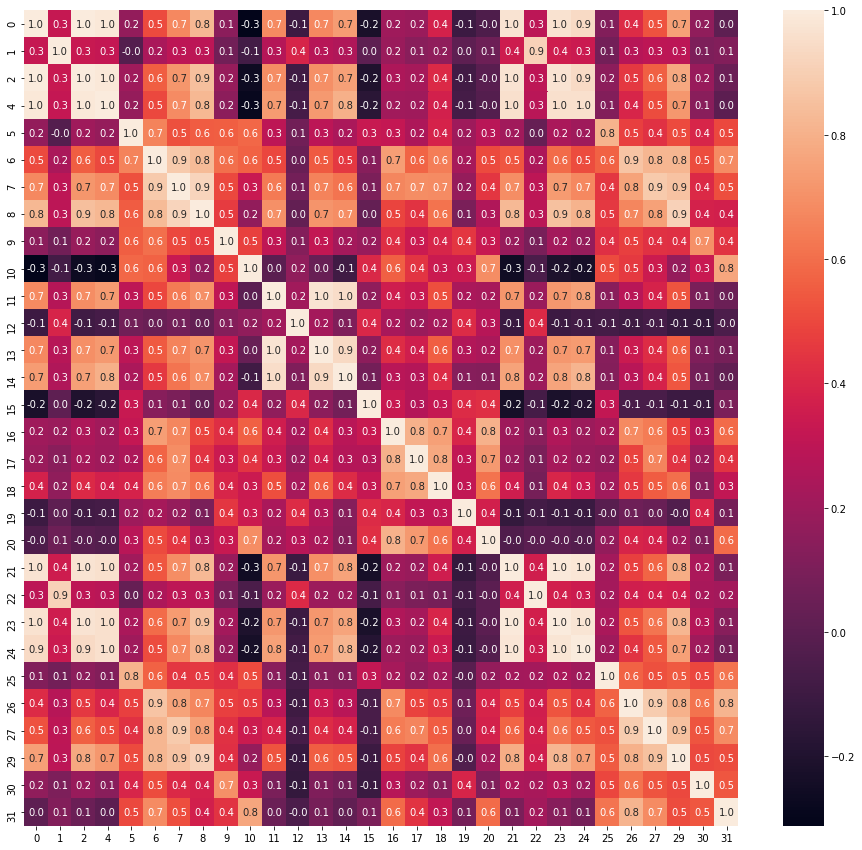

In [32]:
matriz_correlacao = exames_atualizados.corr()

plt.figure(figsize = (16, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')

In [33]:
# Eliminar os exames que possuem alta correlação entre si

matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99] # Mostra um DataFrame com as variáveis de alta correlação
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

0     1.997855
1     1.000000
2     1.997855
4     1.000000
5     1.000000
6     1.000000
7     1.000000
8     1.000000
9     1.000000
10    1.000000
11    1.000000
12    1.000000
13    1.000000
14    1.000000
15    1.000000
16    1.000000
17    1.000000
18    1.000000
19    1.000000
20    1.000000
21    1.993708
22    1.000000
23    1.993708
24    1.000000
25    1.000000
26    1.000000
27    1.000000
29    1.000000
30    1.000000
31    1.000000
dtype: float64

In [34]:
# As variáveis acima que possuirem valor maior do que 1 são variáveis altamente correlacionadas
# Isto não é bom para o modelo de Machine Learning, portanto devem ser retiradas
# Deve-se chegar a tabela de correlações para verificar qual Exame retirar
# Não se deve retirar as duas variáveis que são correlacionadas entre si, apenas uma basta

variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

0     1.997855
2     1.997855
21    1.993708
23    1.993708
dtype: float64

In [35]:
exames_sem_correlacionadas = exames_atualizados.drop([2, 23], axis = 1)

In [36]:
exames_sem_correlacionadas.head()

,0,1,4,5,6,7,8,9,10,11,...,20,21,22,24,25,26,27,29,30,31
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Agora mediremos o desempenho do algoritmo sem essas variáveis altamente correlacionadas.

In [37]:
classificar(exames_sem_correlacionadas)

Score de classificação = 92.98 %


Concluiu-se que a eliminação das duas dimensões não afetou no desempenho do algoritmo de baseline. Isso é bom, já que conseguimos o mesmo desempenho com variáveis a menos.

## Selecionando as melhores features

#### Método SelectKBest

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
k_melhores = SelectKBest(chi2, k = 10) # A função comum para o cálculo do score das features é a chi^2

Como a função chi^2 não recebe valores negativos, temos que retornar aos valores dos exames originais, antes mesmo de padronizá-los (porém mantendo os drops que foram realizados nas colunas).

In [40]:
exames_valores_iniciais = exames.drop(['exame_3', 'exame_4', 'exame_24', 'exame_29'], axis = 1)

In [41]:
X_treino3, X_teste3, y_treino3, y_teste3 = train_test_split(exames_valores_iniciais, diagnostico, random_state = 1234, test_size = 0.3)

In [42]:
k_melhores.fit(X_treino3, y_treino3)

SelectKBest(score_func=<function chi2 at 0x000001F28F5C7670>)

In [43]:
treino_kbest = k_melhores.transform(X_treino3)

In [44]:
teste_kbest = k_melhores.transform(X_teste3)

As variáveis salvas acima são os dataframes contendo os dados dos exames, porém apenas com os 10 exames de "maior importância".

In [45]:
classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)

classificador.fit(treino_kbest, y_treino3)

print(f'Score de classificação = {100*classificador.score(teste_kbest, y_teste3):.2f} %')

Score de classificação = 95.91 %


O score do modelo ficou relativamente melhor. No entanto, mesmo assim deve-se ter cuidado ao utilizá-lo. Problemas ainda podem assombrar esse modelo, como por exemplo: Será que temos maior taxa de acerto em problemas Benignos ou Malignos? Temos que sabê-lo, pois isso pode custar uma vida. 

Em áreas como a da saúde, todo cuidado é pouco. O modelo deve ser analisado mais a fundo.

## Matriz de Confusão

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
previsoes = classificador.predict(teste_kbest)

In [48]:
matriz_confusao = confusion_matrix(y_teste3, previsoes)

[Text(0.5, 48.5, 'Predição'), Text(48.5, 0.5, 'Real')]

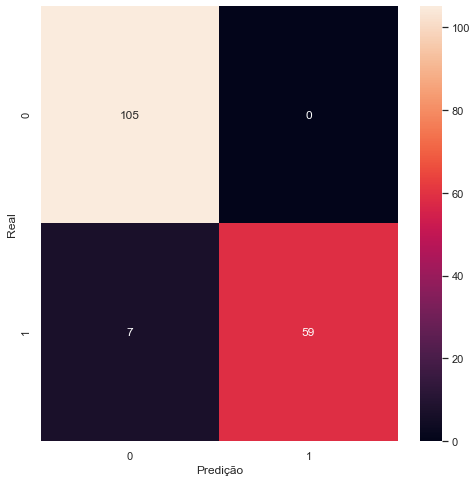

In [49]:
plt.figure(figsize = (8, 8))
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

Na Matriz de Consufão acima, interpreta-se o seguinte: de 105 casos Benignos, o modelo acertou todos; de 66 casos Malignos, o modelo acertou 59 e errou 7 diagnósticos.

#### Agora selecionando os melhores exames por método RFE (Recursive Feature Elimination)

In [50]:
from sklearn.feature_selection import RFE

In [51]:
X_treino4, X_teste4, y_treino4, y_teste4 = train_test_split(exames_valores_iniciais, 
                                                            diagnostico, 
                                                            random_state = 1234, 
                                                            test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)

classificador.fit(X_treino4, y_treino4)

selecionar_por_rfe = RFE(estimator = classificador, n_features_to_select = 10 , step = 1)

selecionar_por_rfe.fit(X_treino4, y_treino4)

treino_rfe = selecionar_por_rfe.transform(X_treino4)

teste_rfe = selecionar_por_rfe.transform(X_teste4)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)

classificador.fit(treino_rfe, y_treino4)

print(f'Score de classificação = {100*classificador.score(teste_rfe, y_teste4):.2f} %')

Score de classificação = 92.98 %


In [52]:
previsoes = classificador.predict(teste_rfe)

In [53]:
matriz_confusao = confusion_matrix(y_teste4, previsoes)

[Text(0.5, 48.5, 'Predição'), Text(48.5, 0.5, 'Real')]

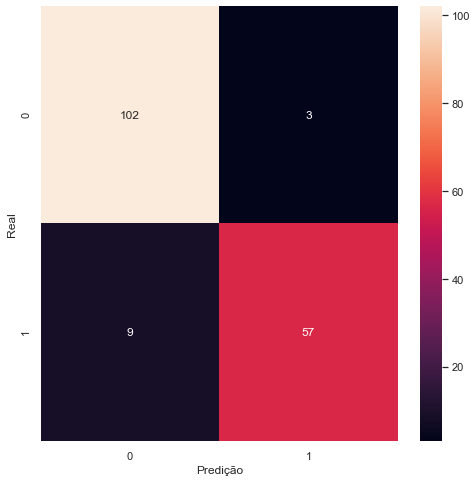

In [54]:
plt.figure(figsize = (8, 8))
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

Conclusão: Para esse conjunto de dados, o método SelectKBest apresentou melhores resultados do que o método RFE

### Implementando o método RFECV

Esse método nos diz a quantidade ideal de features que deve ser utilizado no ajuste de dados e, além disso, também nos informa quais features devemos utilizar.

In [55]:
from sklearn.feature_selection import RFECV

In [56]:
X_treino5, X_teste5, y_treino5, y_teste5 = train_test_split(exames_valores_iniciais, 
                                                            diagnostico, 
                                                            random_state = 1234, 
                                                            test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)

classificador.fit(X_treino5, y_treino5)

selecionar_por_rfecv = RFECV(estimator = classificador, cv = 5, scoring = 'accuracy', step = 1)

selecionar_por_rfecv.fit(X_treino5, y_treino5)

treino_rfecv = selecionar_por_rfecv.transform(X_treino5)

teste_rfecv = selecionar_por_rfecv.transform(X_teste5)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)

classificador.fit(treino_rfecv, y_treino5)

print(f'Score de classificação = {100*classificador.score(teste_rfecv, y_teste5):.2f} %')

Score de classificação = 92.98 %


In [57]:
previsoes = classificador.predict(teste_rfecv)

In [58]:
matriz_confusao = confusion_matrix(y_teste5, previsoes)

[Text(0.5, 48.5, 'Predição'), Text(48.5, 0.5, 'Real')]

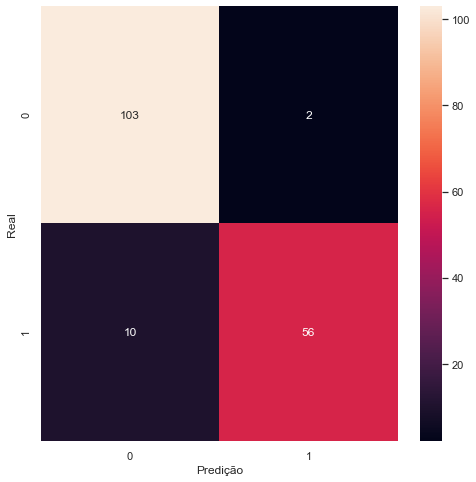

In [59]:
plt.figure(figsize = (8, 8))
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

In [60]:
selecionar_por_rfecv.grid_scores_ # Valores de acurácia para cada quantidade de features

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

In [61]:
# Features selecionadas pelo modelo
# Exames necessários para atingir o melhor resultado

X_treino5.columns[selecionar_por_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

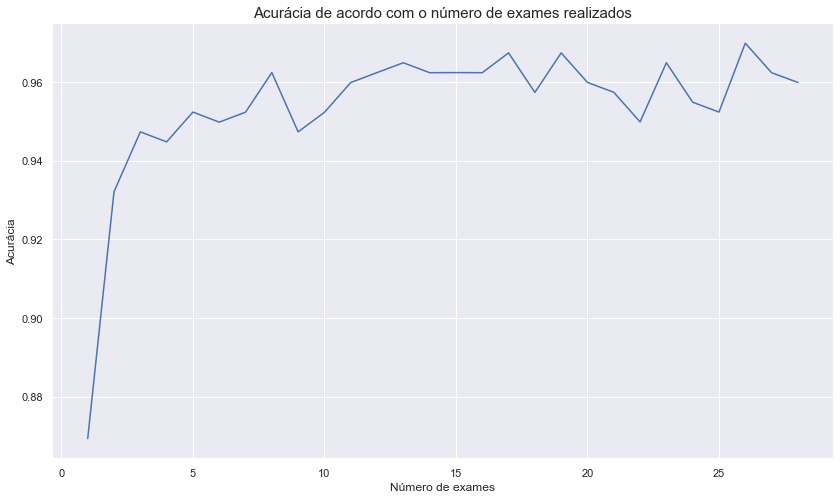

In [64]:
plt.figure(figsize = (14, 8))
plt.title('Acurácia de acordo com o número de exames realizados', fontsize = 15)
plt.xlabel('Número de exames')
plt.ylabel('Acurácia')
plt.plot(range(1, len(selecionar_por_rfecv.grid_scores_)+1), selecionar_por_rfecv.grid_scores_)
plt.show()

### Redução de dimensionalidade

São técnicas que utilizam transformações matemáticas nos dados antes de processá-los, reduzindo suas dimensões.

Uma das técnicas que podemos utilizar para manter o máximo de informações possível em dimensionalidades reduzidas é o PCA. O PCA opera uma transformação matemática sobre os dados, na qual as primeiras dimensões serão as variáveis que manterão o maior volume possível de informação. Vamos aplicar o PCA nos nossos dados e verificar como ficará a visualização, já que a criada com o feature selection não nos pareceu uma ótima solução.

##### PCA

<AxesSubplot:>

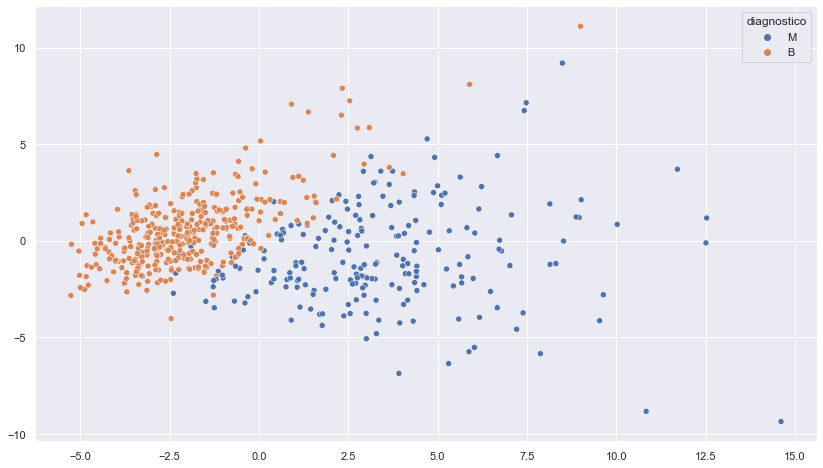

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(exames_sem_correlacionadas) # A utilização de dados padronizados é de melhor visualização

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

##### TSNE

 Ainda existe uma técnica que se comporta melhor quando queremos gerar visualizações, chamada t-SNE, que também está presente no SKlearn. De maneira resumida, a t-SNE tenta manter as distâncias entre os pontos.

<AxesSubplot:>

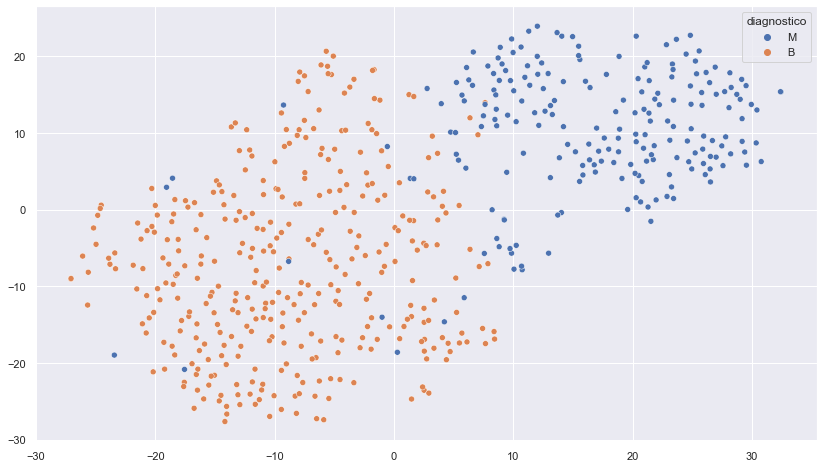

In [67]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(exames_sem_correlacionadas)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)